In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import seaborn as sns
 

In [2]:
df = pd.read_csv("data1/liver_p.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape

(583, 11)

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
 df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
 features = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


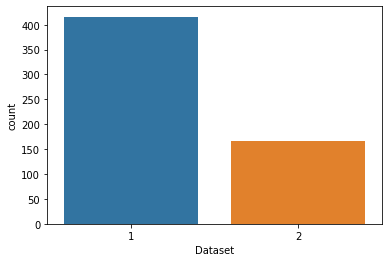

In [14]:
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


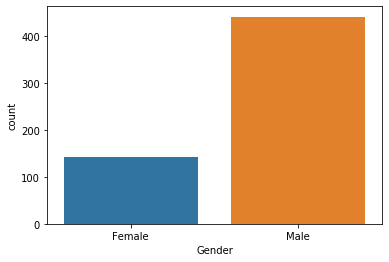

In [16]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

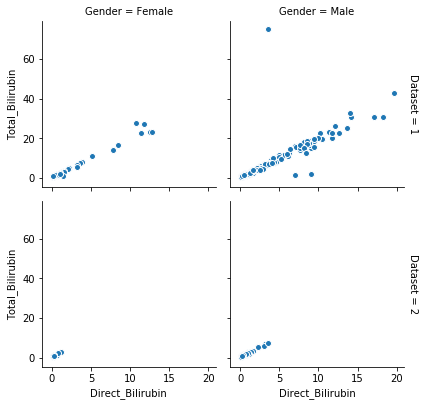

In [17]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [7]:
X = df[features]
Y = df.Dataset

In [8]:
le = LabelEncoder()
X["Sex"]= le.fit_transform(X["Gender"])
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Sex
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
X.drop("Gender" , axis = 1 , inplace = True )
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Sex
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [20]:
imp = SimpleImputer(strategy ="mean")
X_new =pd.DataFrame(imp.fit_transform(X))
X_new.columns = df[features].columns
X_new.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0.0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [21]:
X_new.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [22]:
X_arr = X_new.iloc[: , : ]
Y_arr = df.iloc[: , -1]
sc = StandardScaler()
X_arr = sc.fit_transform(X_arr)
X_arr

array([[ 1.25209764, -0.41887783, -0.49396398, ...,  0.19896867,
        -0.14789798, -1.76228085],
       [ 1.06663704,  1.22517135,  1.43042334, ...,  0.07315659,
        -0.65069686,  0.56744644],
       [ 1.06663704,  0.6449187 ,  0.93150811, ...,  0.19896867,
        -0.17932291,  0.56744644],
       ...,
       [ 0.44843504, -0.4027597 , -0.45832717, ...,  0.07315659,
         0.16635131,  0.56744644],
       [-0.84978917, -0.32216906, -0.35141677, ...,  0.32478075,
         0.16635131,  0.56744644],
       [-0.41704777, -0.37052344, -0.42269037, ...,  1.58290153,
         1.73759779,  0.56744644]])

In [23]:
X_train , X_test , Y_train , Y_test = train_test_split(X_arr , Y_arr , test_size = 0.2 , shuffle = True)
len(X_train) , len(X_test) , len(Y_train) , len(Y_test)

(466, 117, 466, 117)

# KNN

In [31]:
model_knn = KNeighborsClassifier(n_neighbors= 3)
model_knn.fit(X_train , Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
pred = model_knn.predict(X_test)
score = accuracy_score(pred , Y_test)
score


0.6324786324786325

In [33]:
cm = confusion_matrix(Y_test , pred)
print(cm)

[[64 18]
 [25 10]]


# Random Forest


In [34]:
model_forest = RandomForestClassifier(n_estimators= 700 , random_state = 1)
model_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
model_forest.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [36]:
pred_forest = model_forest.predict(X_test)
score_forest = accuracy_score(pred_forest , Y_test)
score_forest

0.6837606837606838

In [37]:
cm_forest = confusion_matrix(Y_test , pred_forest)
print(cm_forest)

[[70 12]
 [25 10]]


# Decision Tree 

In [38]:
model_decision = DecisionTreeClassifier(max_depth= 10 , random_state= 1)
model_decision.fit(X_train , Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [39]:
pred_decision = model_decision.predict(X_test)
pred_decision
score = accuracy_score(pred_decision , Y_test)
score


0.6752136752136753

# SVM

In [40]:
model_svm = svm.SVC(C = 10, gamma = 5)
model_svm


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
model_svm.fit(X_train , Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
pred_svm = model_svm.predict(X_test)
pred_svm

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
score_svm = accuracy_score(Y_test , pred_svm)
score_svm

0.7264957264957265